# Source Distribution on an Airfoil

## Bob Forcha
## Assignment 1
## MAE 6226 - Aero / Hydro
## The George Washington University

In [5]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# functions

def create_mesh_grid(xs, xe, ys, ye, N):
    """
    Returns 2 2D NxN arrays  of x and y coordinates
    
    params:
        xs: beginning x-coordinate
        xe: ending x-coordinate
        ys: beginning y-coordinate
        ye: ending y-coordinate
        N: integer size of array (NxN)
        
    returns:
        2 NxN numpy arrays
    """
    
    x = np.linspace(xs, xe, N)
    y = np.linspace(ys, ye, N)
    return np.meshgrid(x, y)

def get_freestream_velocity(x, y, u):
    """
    Returns freestream velocity profile
    
    params:
        x: 2D numpy array of x-coordinates
        y: 2D numpy array of y-coordinates
        u: freestream velocity magnitude
        
    returns:
        2 2D numpy arrays of velocities
    """
    
    u = u*np.ones(np.shape(x), dtype=float)
    v = np.zeros(np.shape(y), dtype=float)
    
    return u, v

def get_velocity_source(x, y, xs, ys, sigma):
    """
    Returns velocity profile for a source
    
    params:
        x: 2D numpy array of x-coordinates
        y: 2D numpy array of y-coordinates
        xs: x_coordinate of source
        ys: y_coordinate of source
        sigma: source strength
        
    returns:
        2 2D numpy arrays of velocities
    """
    
    u = sigma/(2*math.pi)*(x - xs)/((x - xs)**2 + (y - ys)**2)
    v = sigma/(2*math.pi)*(y - ys)/((x-xs)**2 + (y-ys)**2)
    
    return u, v

def get_stream_function_source(x, y, xs, ys, sigma):
    """
    Returns array of stream function values for a source
    
    params:
        x: 2D numpy array of x-coordinates
        y: 2D numpy array of y-coordinates
        xs: x_coordinate of source
        ys: y_coordinate of source
        sigma: strength of source
        
    returns:
        2D numpy array of stream function values
    """
    
    return sigma/(2*math.pi)*np.arctan2((y-ys), (x-xs))


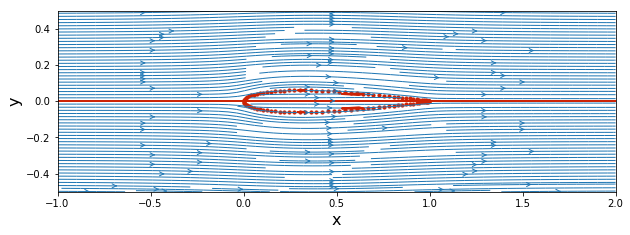

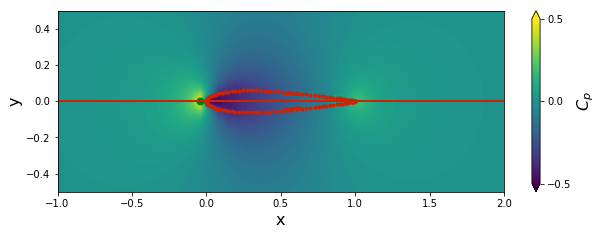

In [7]:
# declare variables

x_start = -1.0
x_end = 2.0
y_start = -0.5
y_end = 0.5
N = 51
u_inf = 1.0
x_sources = np.loadtxt('NACA0012_x.txt')
y_sources = np.loadtxt('NACA0012_y.txt')
strength_sources = np.loadtxt('NACA0012_sigma.txt')

# create meshgrid

X, Y = create_mesh_grid(x_start, x_end, y_start, y_end, N)

# freestream velocities and stream function
u_fs, v_fs = get_freestream_velocity(X, Y, u_inf)
psi_fs = u_inf*Y

# source/sink velocities and stream function
u_s = np.zeros(np.shape(X), dtype=float)
v_s = np.zeros(np.shape(Y), dtype=float)
psi_s = np.zeros(np.shape(X), dtype=float)
i = 0

while i < np.size(x_sources):
    u_s_old = np.copy(u_s)
    v_s_old = np.copy(v_s)
    psi_s_old = np.copy(psi_s)
    u_s, v_s = get_velocity_source(X, Y, x_sources[i], y_sources[i], strength_sources[i])
    psi_s = get_stream_function_source(X, Y, x_sources[i], y_sources[i], strength_sources[i])
    u_s += u_s_old
    v_s += v_s_old
    psi_s += psi_s_old
    i += 1


# superposition
u, v, psi = u_fs + u_s, v_fs + v_s, psi_fs + psi_s

# plot streamlines and airfoil profile
size = 10
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_sources, y_sources, color='#CD2305', s=10, marker='o')
plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

# calculate Cp and stagnation point
c_p = 1.0 - (u**2 + v**2)/u_inf**2
max_cp = np.max(c_p)
x_stag = X[np.unravel_index(np.argmax(c_p), np.shape(c_p))]
y_stag = Y[np.unravel_index(np.argmax(c_p), np.shape(c_p))]

# plot pressure coefficient and stagnation point
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, c_p, levels=np.linspace(-0.5, 0.5, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.5, 0.0, 0.5])
plt.scatter(x_sources, y_sources, color='#CD2305', s=10, marker='o')
plt.scatter(x_stag, y_stag, color = 'g', s=50, marker='o')
plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

In [8]:
print('Maximum C_p: %f' % max_cp)
print('Index 1 of maximum C_p value: %f' % np.unravel_index(np.argmax(c_p), np.shape(c_p))[0])
print('Index 2 of maximum C_p value: %f' % np.unravel_index(np.argmax(c_p), np.shape(c_p))[1])
print('X-coordinate of maximum C_p: %f' % x_stag)
print('Y-coordinate of maximum C_p: %f' % y_stag)

Maximum C_p: 0.471444
Index 1 of maximum C_p value: 25.000000
Index 2 of maximum C_p value: 16.000000
X-coordinate of maximum C_p: -0.040000
Y-coordinate of maximum C_p: 0.000000
